In [0]:
# Importing Libraries 
import numpy as np                                          # Implemennts milti-dimensional array and matrices
import pandas as pd                                         # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                             # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                       # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [3]:
olympic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")
olympic_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


1. **Lets get the data set iinformation and Description**

In [4]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


There are total 31165 entries , information provided with 9 columns

2. **High Level Description of the Data Set**

In [5]:
olympic_data.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Profiling using Panda Profile

In [0]:
profile_data = pandas_profiling.ProfileReport(olympic_data)
profile_data.to_file(outputfile = "olympicdata_pre_profile.html")

In [7]:
profile_data

Number of variables,9
Number of observations,31165
Total Missing (%),0.0%
Total size in memory,2.1 MiB
Average record size in memory,72.0 B
Numeric,1
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Get the missing value from data Set

Drop Duplicate valued

In [0]:
olympic_data.drop_duplicates(inplace=True)

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(olympic_data)

,Total,Percent
Country,4,0.012836
Medal,0,0.000000
Event,0,0.000000
Gender,0,0.000000
Athlete,0,0.000000
Discipline,0,0.000000
Sport,0,0.000000
City,0,0.000000
Year,0,0.000000


In [10]:
olympic_data.Country.mode()

0    USA
dtype: object

In [11]:
olympic_data.mode()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,2008,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold


Replace The missing country value with - mode value of country

In [0]:
olympic_data.fillna('USA',inplace = True)

Crate profile - post processing od data

In [13]:
postProfile_data = pandas_profiling.ProfileReport(olympic_data)
postProfile_data

Number of variables,10
Number of observations,31163
Total Missing (%),0.0%
Total size in memory,2.4 MiB
Average record size in memory,80.0 B
Numeric,1
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,1


1**. In overall performance USA is Top, URS and GBR are respective 2 and 3**

In [14]:
olympic_data.head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold


In [15]:
olympic_data.columns = map(str.lower, olympic_data.columns)  
# map() function returns a list of results after applying the given function to each item of a given iterable.
olympic_data.dtypes
# Confirm that all variable names are now lower case

year           int64
city          object
sport         object
discipline    object
athlete       object
country       object
gender        object
event         object
medal         object
dtype: object

3**. Distrubution with different parameter**

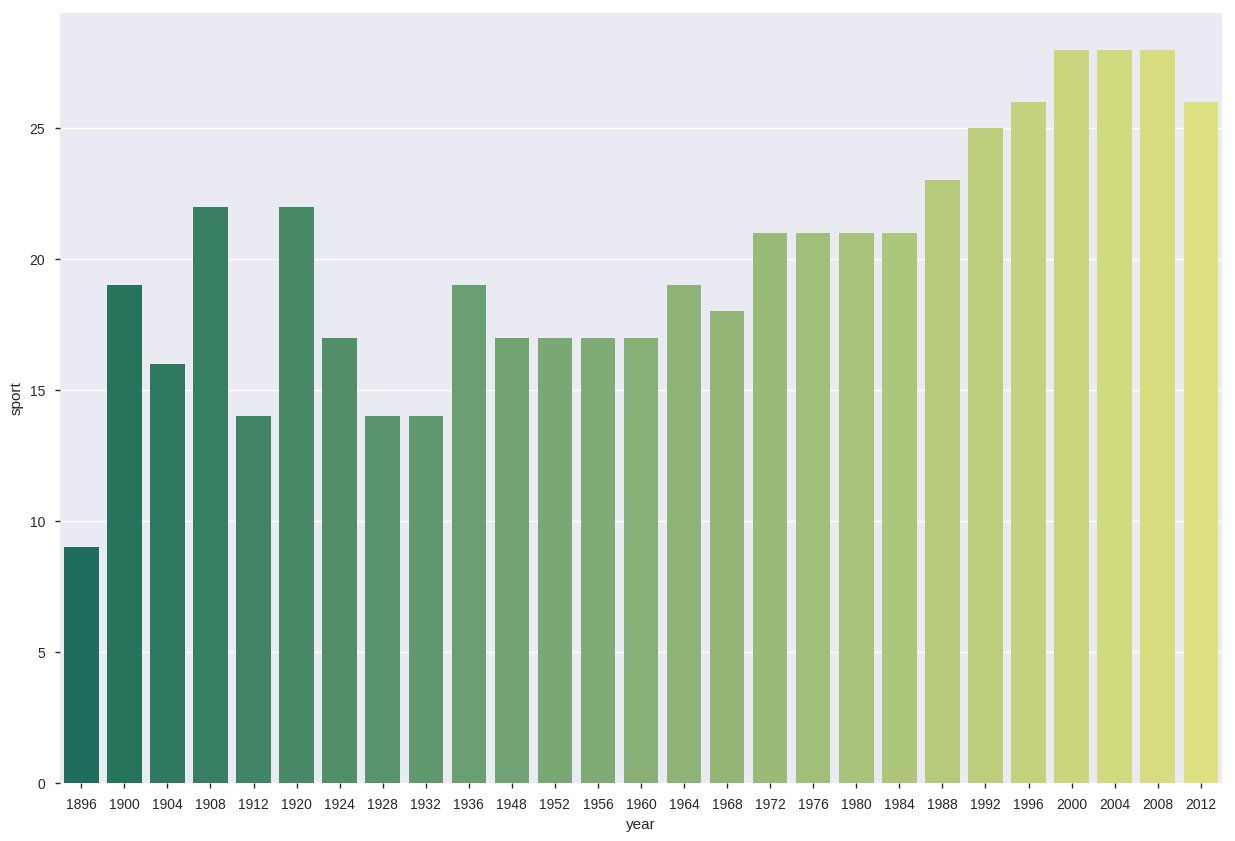

In [87]:

df_countrymedal = olympic_data.groupby("year")["sport"].nunique().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize=(15,10))
fig.add_subplot(111)
sns.barplot(x = "year", y = "sport", data=df_countrymedal, palette="summer", saturation=.65 )

*   In 2000,2004 and 2008 Maximum number of Olympic event heldList item
*   1n 1896 the number was minimum



3.1 **Men and Women Participation through out the year**

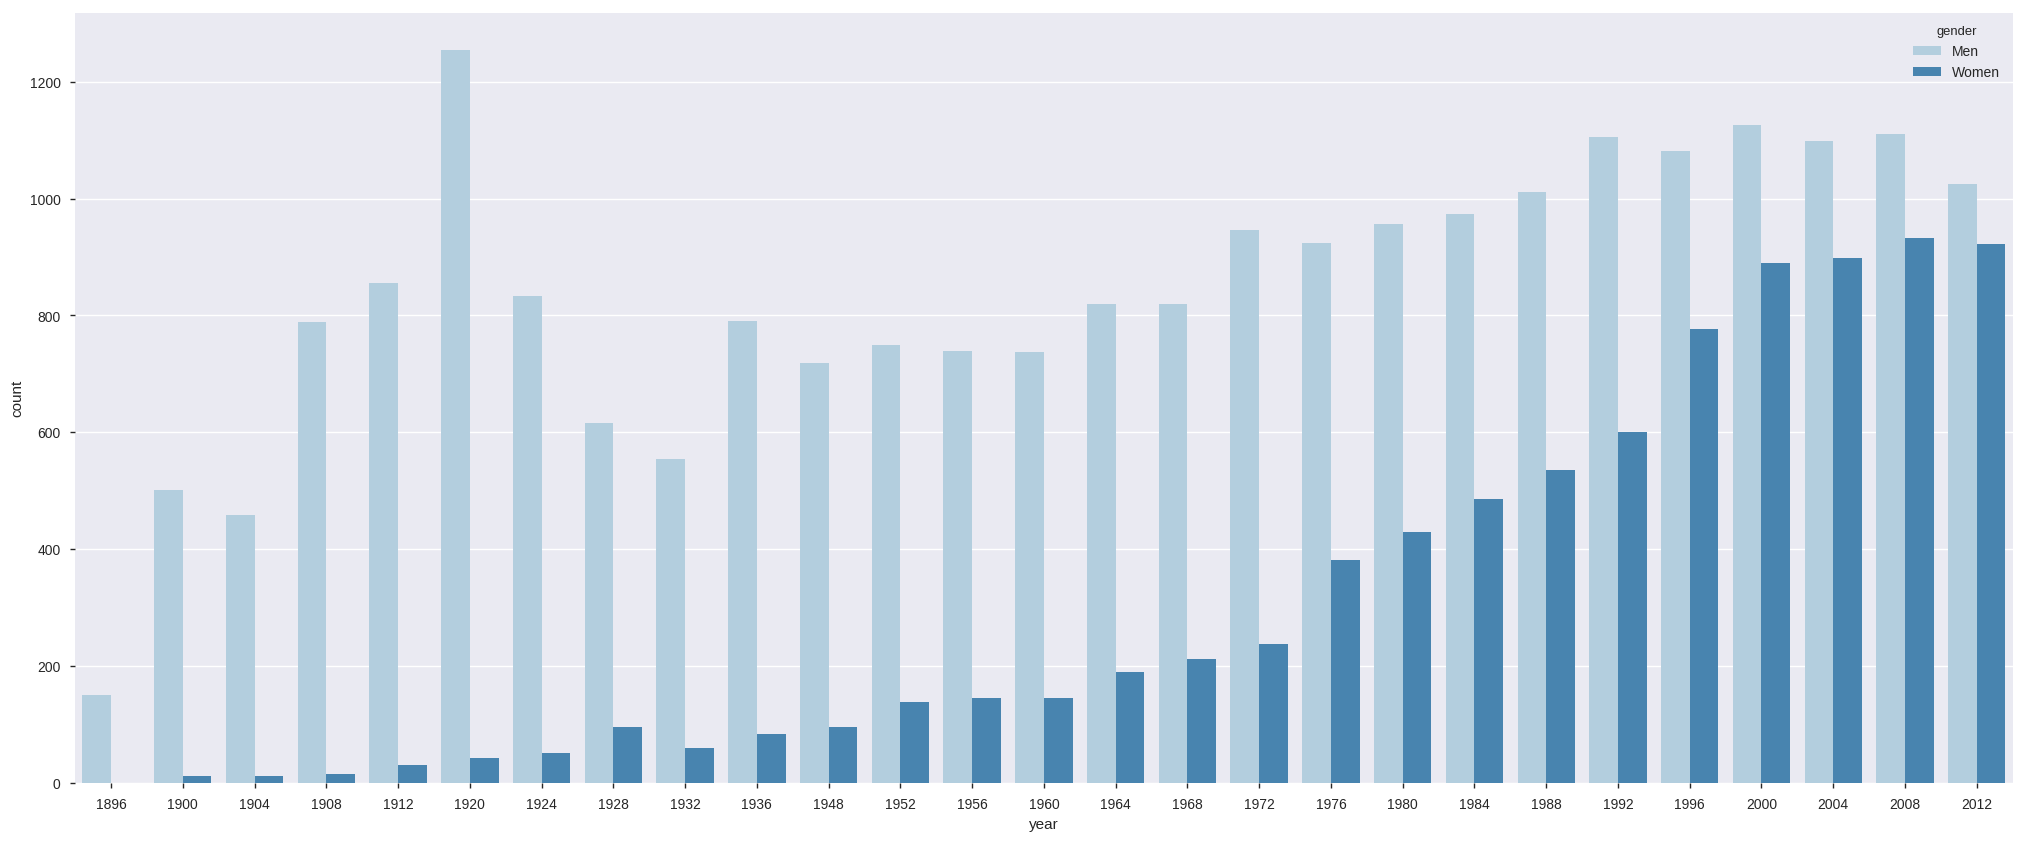

In [17]:

df_sports = olympic_data.groupby(["year","gender"])["medal"].count().reset_index().rename(columns={"medal":"count"})
plt.figure(figsize=(25,10))
sns.barplot(x="year", y = "count", hue = "gender", data = df_sports, palette = "Blues" )

**3.2 Men and Women Participation in Different venue**

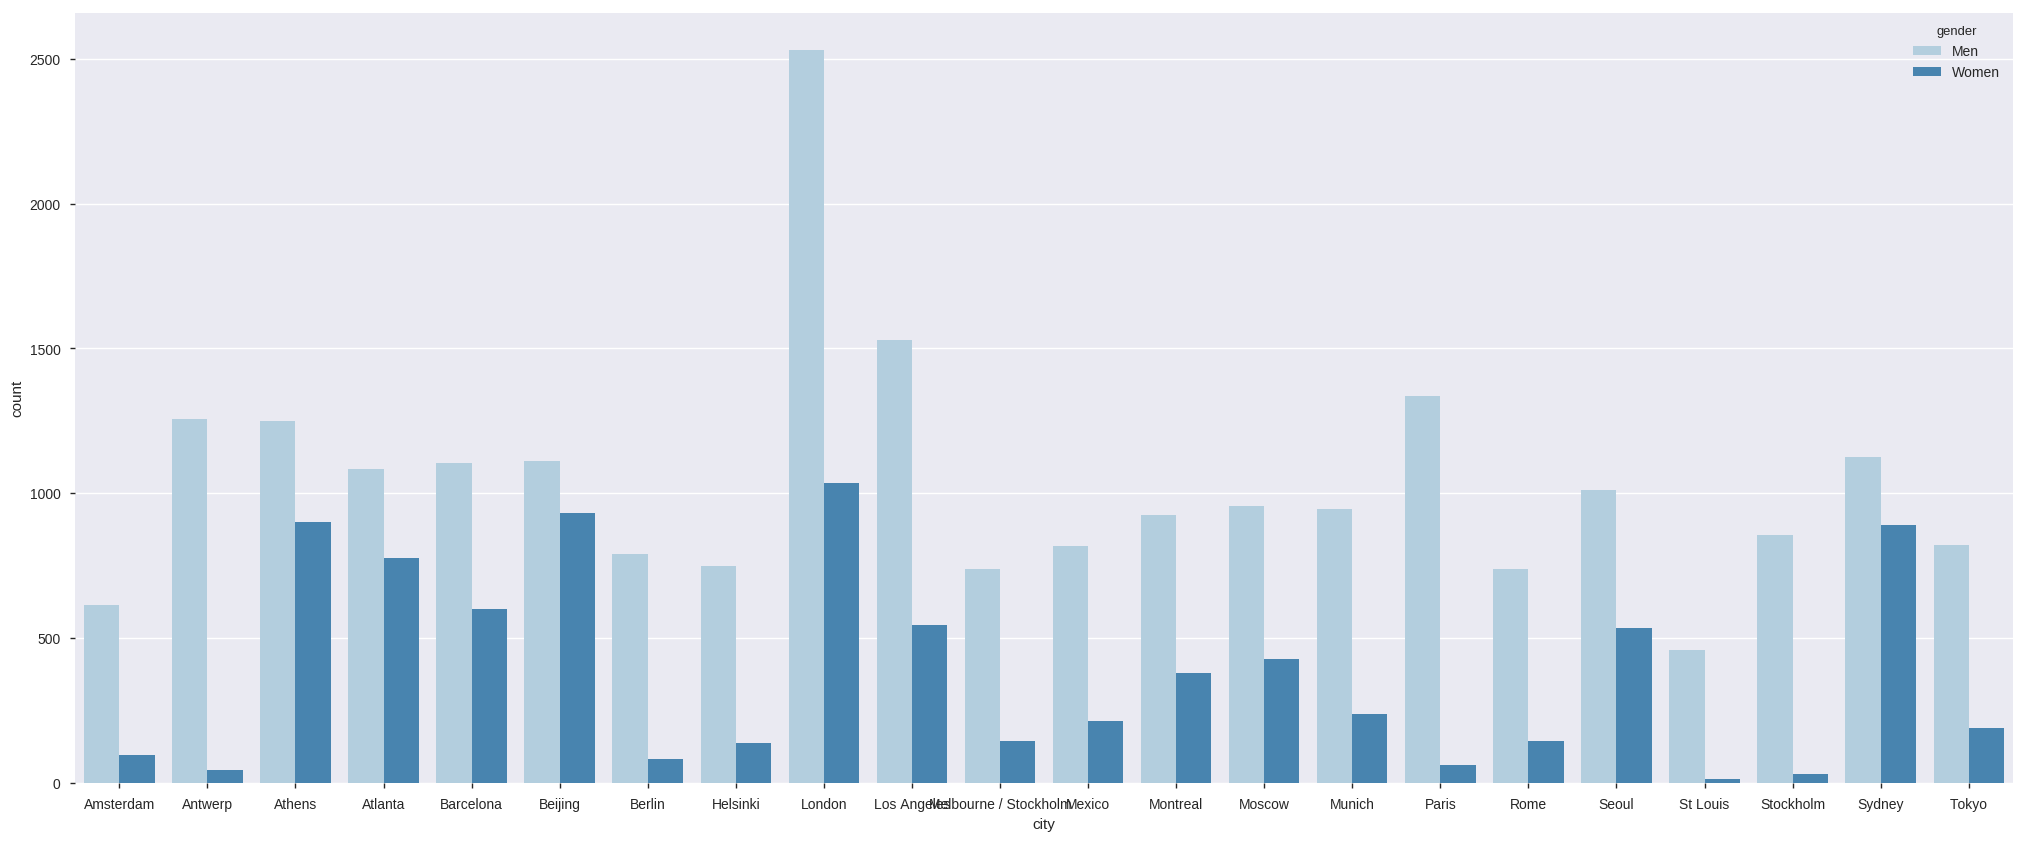

In [86]:
df_sports = olympic_data.groupby(["city","gender"])["medal"].count().reset_index().rename(columns={"medal":"count"})
plt.figure(figsize=(25,10))
sns.barplot(x="city", y = "count", hue = "gender", data = df_sports, palette = "Blues" )

In [19]:
olympic_data["id"]=range(0,len(olympic_data))
olympic_data.head(5)

,year,city,sport,discipline,athlete,country,gender,event,medal,id
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,2
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,3
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,4


**3.3 - Men VS Women overall participation ratio**

Text(0.5, 1.0, 'SUMMER OLYMPICS')

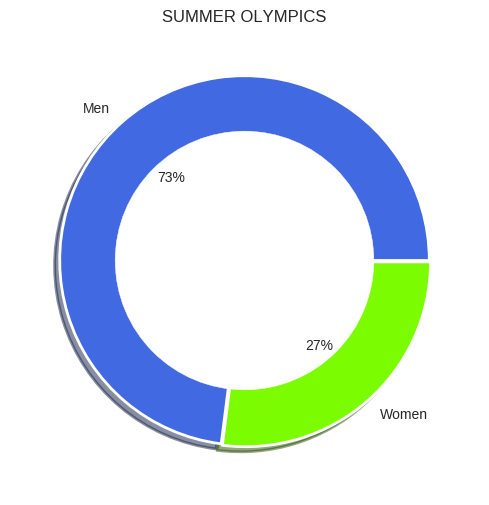

In [32]:
plt.figure(figsize=(13,6))
olympic_data.groupby("gender")["id"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["royalblue","lawngreen"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("SUMMER OLYMPICS")

3.4
Lets filter the data set - on gold medal won by women
Then - plot the graph - group by year

In [40]:
Womend_gold = olympic_data[(olympic_data["gender"]=="Women")&(olympic_data["medal"]=="Gold")]
Womend_gold.groupby("year")["medal"].value_counts()

year  medal
1900  Gold       3
1904  Gold       6
1908  Gold       5
1912  Gold      10
1920  Gold      15
1924  Gold      17
1928  Gold      32
1932  Gold      20
1936  Gold      28
1948  Gold      32
1952  Gold      46
1956  Gold      46
1960  Gold      49
1964  Gold      63
1968  Gold      71
1972  Gold      80
1976  Gold     127
1980  Gold     143
1984  Gold     163
1988  Gold     172
1992  Gold     200
1996  Gold     259
2000  Gold     293
2004  Gold     298
2008  Gold     307
2012  Gold     302
Name: medal, dtype: int64

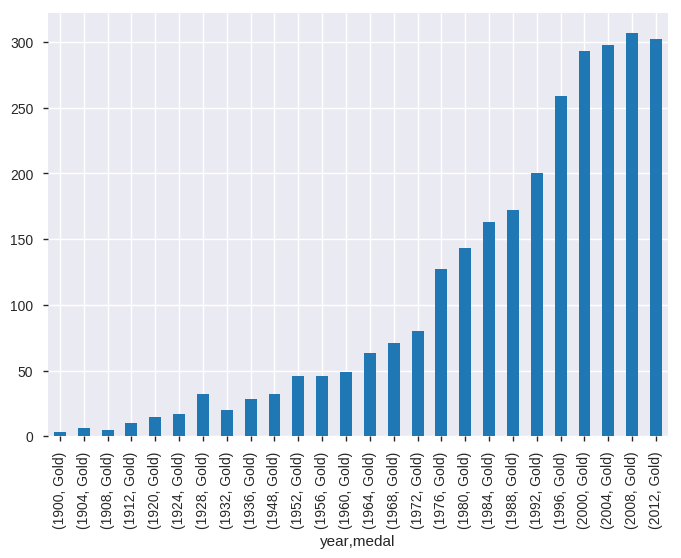

In [35]:
Womend_gold = olympic_data[(olympic_data["gender"]=="Women")&(olympic_data["medal"]=="Gold")]
Womend_gold.groupby("year")["medal"].value_counts().plot.bar()

4 **Men VS Women Performance progress chart - Each Year**

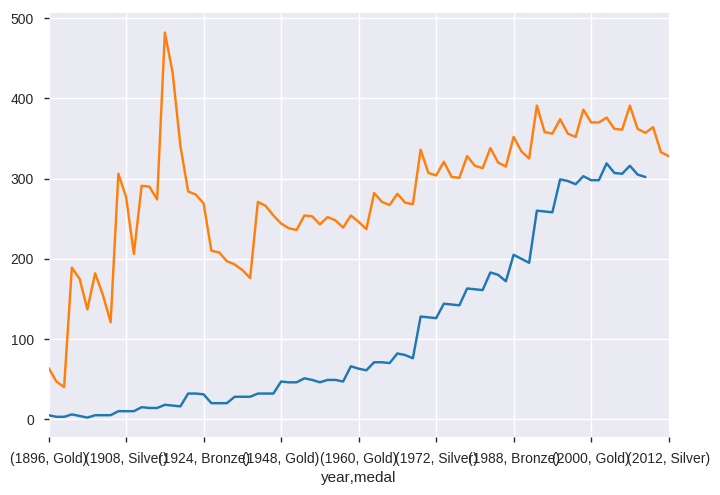

In [41]:
Women_medal = olympic_data[(olympic_data["gender"]=="Women")]
Men_medal = olympic_data[(olympic_data["gender"]=="Men")]
Women_medal.groupby("year")["medal"].value_counts().plot.line()
Men_medal.groupby("year")["medal"].value_counts().plot.line()

Women Performmance was started acelated from 1976 olympic onwards

5. **Deep Drive to Football ** 


> Lets filter the data for Footbal and get the TOP 5



In [95]:
df_football = olympic_data[(olympic_data["event"]=="Football")]["country"].value_counts()
df_football.head(10)

USA    132
BRA    127
URS     91
HUN     80
YUG     73
ARG     72
ITA     53
GER     53
GDR     51
NOR     50
Name: country, dtype: int64

In [91]:
df_football = olympic_data[(olympic_data["event"]=="Football")&(olympic_data["medal"]=="Gold")]["country"].value_counts()
df_football.head(5)

USA    91
HUN    46
URU    44
URS    38
GBR    33
Name: country, dtype: int64




*   In Football USA's Performance is TOP in Tola Medals and Gold
*   Brazil in Second place wining total number od Gols



**America VS Brazil in Football**

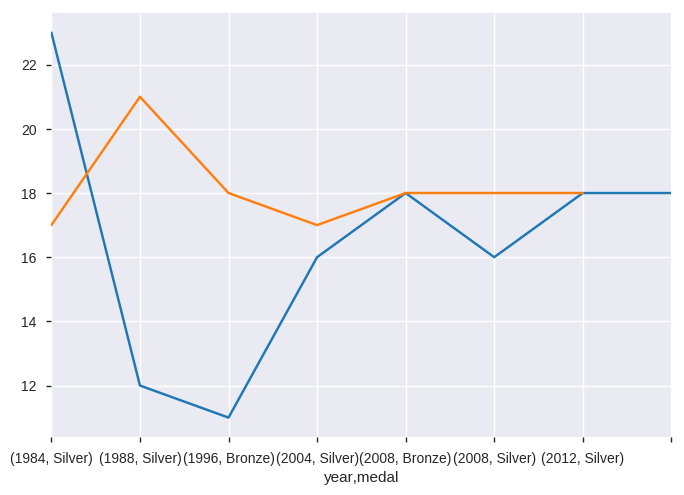

In [94]:
df_USA_Football = olympic_data[(olympic_data["country"]=="USA")&(olympic_data["event"]=="Football")]
df_Bra_Football = olympic_data[(olympic_data["country"]=="BRA")&(olympic_data["event"]=="Football")]
df_USA_Football.groupby("year")["medal"].value_counts().plot.line()
df_Bra_Football.groupby("year")["medal"].value_counts().plot.line()

**American Football**

In [26]:
USA_data_football = olympic_data[(olympic_data["country"]=="USA")&(olympic_data["event"]=="Football")]
USA_data_football.groupby("year")["medal"].value_counts().sort_values(ascending=True)

year  medal 
1904  Silver    11
      Bronze    12
1996  Gold      16
2004  Gold      16
2000  Silver    18
2008  Gold      18
2012  Gold      18
1904  Gold      23
Name: medal, dtype: int64

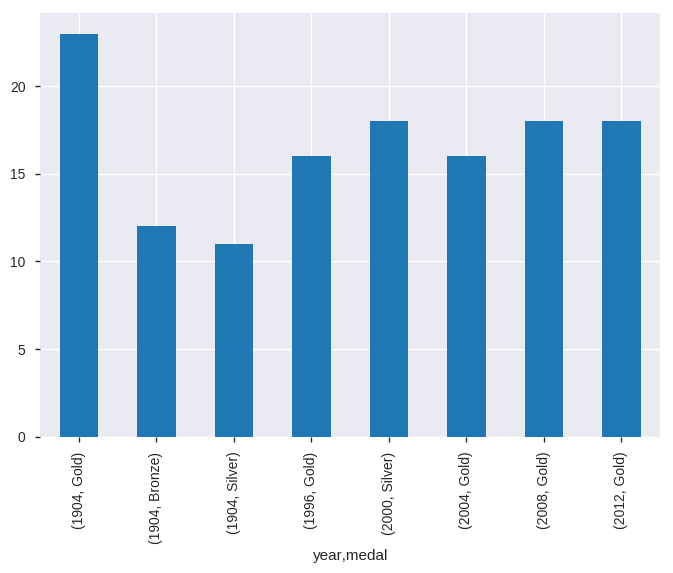

In [85]:
USA_data_football.groupby("year")["medal"].value_counts().plot.bar()

USA bagged Gold in Football in consecutive thre olympics -2004,2008 and 2012.
In 1904 olympic USA bagged football medals in all three category

**6. Lets deep drive in India**

In [0]:
Men_medal = olympic_data[(olympic_data["country"]=="IND")]
#Men_medal.groupby("year").plot.bar(stacked=True)

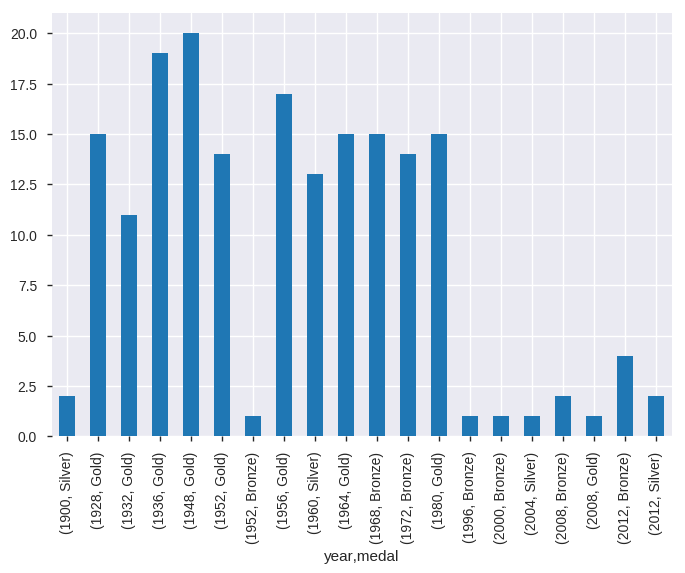

In [27]:
IndiaPerformance = olympic_data[(olympic_data["country"]=="IND")]
IndiaPerformance.groupby("year")["medal"].value_counts().plot.bar()

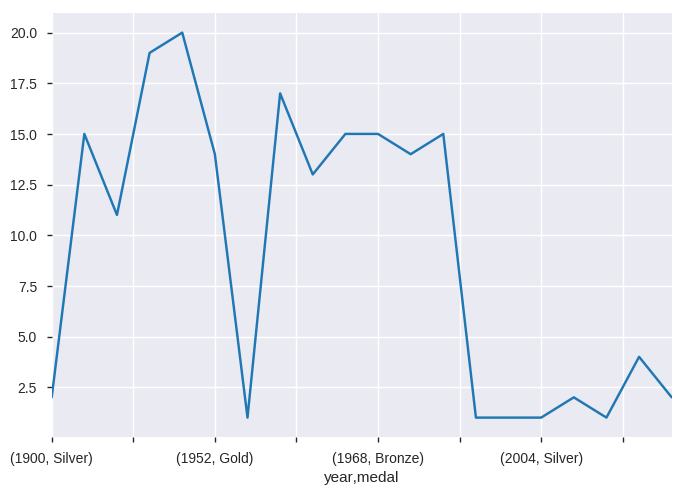

In [28]:
IndiaPerformance.groupby("year")["medal"].value_counts().plot.line()

India performance over all not consistent and also no trend. Need to improve infruscture and correcton in other parameter.
But surprisingly there is a noticable increasing trend between 1930 to 1950. India consistently perform better. There may be three causes - 1.India's freedom struggle and aggression - result agression in Olympic field. 2.India was united as India, Pakisthan and Bangledesh. 3. India WOn in Hockey whcih is a team game


**Lets Check Pakistan performance**

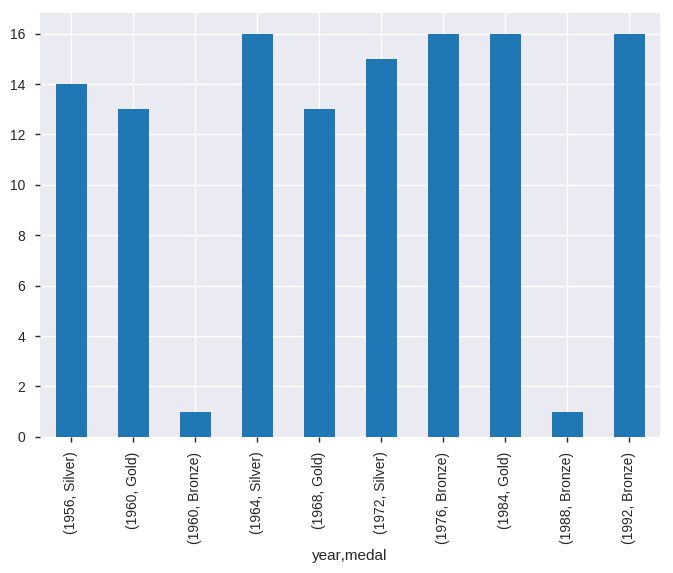

In [24]:
PAKPerformance = olympic_data[(olympic_data["country"]=="PAK")]
PAKPerformance.groupby("year")["medal"].value_counts().plot.bar()

In [29]:
IndiaPerformance.groupby("year")["medal"].value_counts()

year  medal 
1900  Silver     2
1928  Gold      15
1932  Gold      11
1936  Gold      19
1948  Gold      20
1952  Gold      14
      Bronze     1
1956  Gold      17
1960  Silver    13
1964  Gold      15
1968  Bronze    15
1972  Bronze    14
1980  Gold      15
1996  Bronze     1
2000  Bronze     1
2004  Silver     1
2008  Bronze     2
      Gold       1
2012  Bronze     4
      Silver     2
Name: medal, dtype: int64

In [30]:
PAKPerformance.groupby("year")["medal"].value_counts()

year  medal 
1956  Silver    14
1960  Gold      13
      Bronze     1
1964  Silver    16
1968  Gold      13
1972  Silver    15
1976  Bronze    16
1984  Gold      16
1988  Bronze     1
1992  Bronze    16
Name: medal, dtype: int64

In [0]:
Both India and Pakisthan did well when they win Hokey. Since this is group game, all team participant got Gold. So number is high
During the freedom fight era we did consistant good in Hockey. 
Till 1990 - Both India and Pak did well in Hockey. 

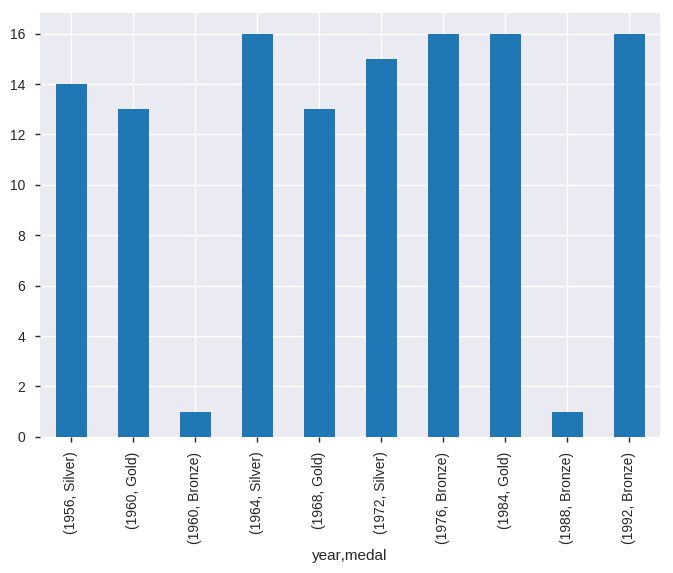

In [96]:
PAKPerformance.groupby("year")["medal"].value_counts().plot.bar()

7. **Top 5 country performance progress report through out the year**

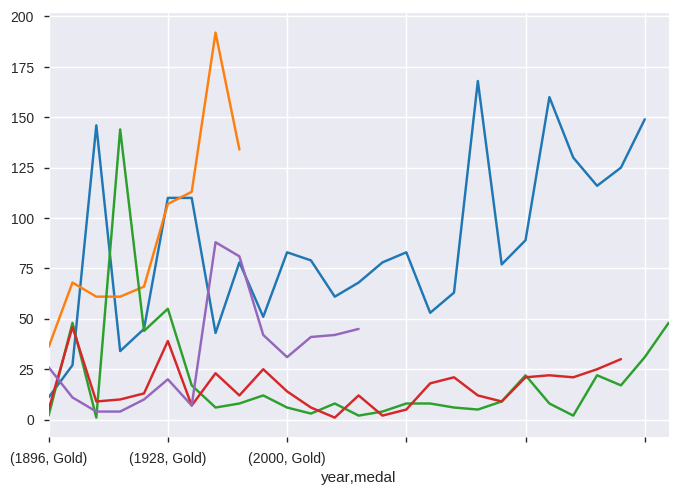

In [21]:
#f,ax = plt.subplots(1,3,figsize=(20,7))
Top1 = olympic_data[(olympic_data["country"]=="USA")&(olympic_data["medal"]=="Gold")]
Top2 = olympic_data[(olympic_data["country"]=="URS")&(olympic_data["medal"]=="Gold")]
Top3 = olympic_data[(olympic_data["country"]=="GBR")&(olympic_data["medal"]=="Gold")]
Top4 = olympic_data[(olympic_data["country"]=="FRA")&(olympic_data["medal"]=="Gold")]
Top5 = olympic_data[(olympic_data["country"]=="GER")&(olympic_data["medal"]=="Gold")]
Top1.groupby("year")["medal"].value_counts().plot.line()
Top2.groupby("year")["medal"].value_counts().plot.line()
Top3.groupby("year")["medal"].value_counts().plot.line()
Top4.groupby("year")["medal"].value_counts().plot.line()
Top5.groupby("year")["medal"].value_counts().plot.line()


USA performance cosistantly improved.Great Britain (GBR) and France did consistanant

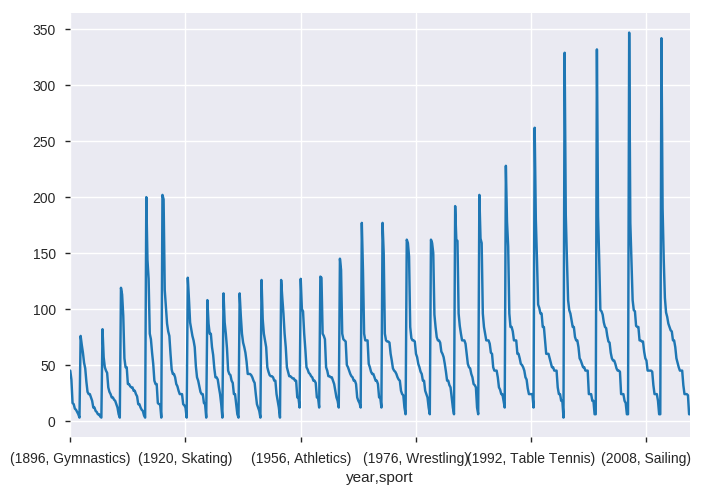

In [31]:
olympic_data.groupby("year")["sport"].value_counts().plot.line()

**8.1 - Top 10 Women athlete**

Text(0.5, 1.0, 'Total medal Women Athlete')

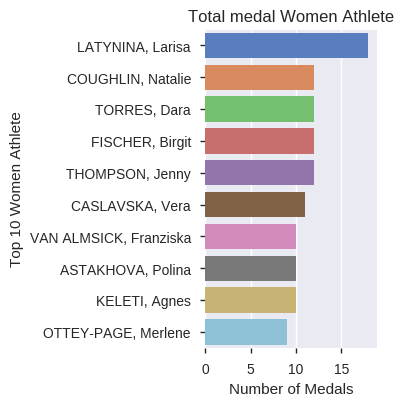

In [81]:
Women_medal = olympic_data[(olympic_data["gender"]=="Women")]['athlete'].value_counts().reset_index(name='athlete').head(10)

g = sns.catplot(y="index", x="athlete", data=Women_medal,
                height=4, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Number of Medals")
g.set_ylabels("Top 10 Women Athlete")
plt.title('Total medal Women Athlete')

**8.2 - Top 10 Men athlete**

Text(0.5, 1.0, 'Total medal Men Athlete')

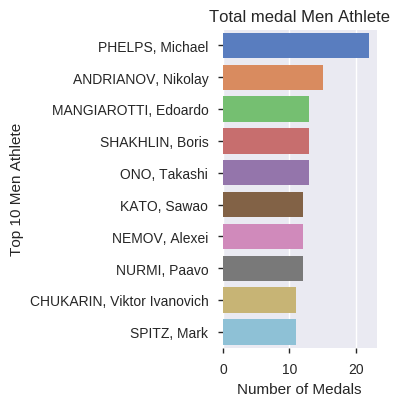

In [82]:
Men_medal = olympic_data[(olympic_data["gender"]=="Men")]['athlete'].value_counts().reset_index(name='athlete').head(10)
h = sns.catplot(y="index", x="athlete", data=Men_medal,
                height=4, kind="bar", palette="muted")
h.despine(left=True)
h.set_xlabels("Number of Medals")
h.set_ylabels("Top 10 Men Athlete")
plt.title('Total medal Men Athlete')


**Conclusion:**

This Summer Olympic data set has total 31165 entries
2. Summer Olympic was held in 22 cities.
   Total 147 country participated in Mel and Female category
   3 Types of Medal presented - Gold, Silver and Bronze
2.1-London hosted the maximum number of Sports, total event hosted in London 3567
2.2 -Maximum participation made on Aquatics with frequency 4170
2.3 - Michel,Plelps -Top Athlete with 22 total Medals
2.4 -Maximum Medal distributed in Football with frequency 1497
3 -In 2000,2004 and 2008 Maximum number of Olympic event held.
  -1n 1896 the events number was minimum
3.1 -In 1896 there was no Female athlete participated
3.3 - Overall Men VS Women participation ratio 73:27
4 . Women Performance was started accelerated from 1976 Olympic onwards
5.	In Football USA's Performance is TOP in Tola Medals and Gold
	Brazil in Second place wining total number of Gold
	USA bagged Gold in Football in consecutive three Olympics -2004,2008 and 2012
	In 1904 Olympic USA bagged football medals in all three category
	USA had no medal between 1904 -1996
	Brazil performed consistent throughout
6. India performance over all not consistent and no trend. Need to improve Infrastructure and correction in others  parameter as well. But surprisingly there is a noticeable increasing trend between 1930 to 1950. India        consistently perform better. There may be three causes - 1. India's freedom struggle and aggression - result aggression in Olympic field. 2.India was united as India, Pakistan and Bangladesh. 3. India Won in Hockey which is a team game
7. Top 5 Country Performance Trend on Total Gold
8.1- Larisa, Latynina - Men athlete with Maximum Gold
8.1- Michel,Plelps - Men athlete with Maximum Gold




